In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# 오버피팅 처리. IMDB 데이터

copy from https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비

In [2]:
NUM_WORDS = 1000

In [3]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.imdb.load_data(num_words=NUM_WORDS)

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\JuNoe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)
(25000,)
(25000,)


C:\Users\JuNoe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
print(raw_train_x[:5])
print(raw_train_y[:5])

[list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207,

## 멀티-핫 인코딩

[1 3 5] 와 같은 데이터의 경우 1, 3, 5 인덱스만 1이고 나머지는 0으로 인코딩합니다.

```
[1 3 5] -> [0 1 0 1 0 1 0 0 0 0]   # WORD 길이가 10
```

본 예의 경우 NUM_WORDS가 1000이다.

1개의 데이터는 길이 1000의 벡터이며, 포함된 word 인덱스만 1인 값으로 인코딩 된다.

In [35]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (25000, 1000) 크기의 행렬. 25000은 데이터 갯수, 1000은 NUM_WORDS
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
                                        # numpy 인덱싱 보충자료 참조
    return results


train_x = multi_hot_sequences(raw_train_x, dimension=NUM_WORDS)
test_x = multi_hot_sequences(raw_test_x, dimension=NUM_WORDS)
train_y = raw_train_y
test_y = raw_test_y

In [36]:
print(raw_train_x.shape)
print(raw_train_x[0])
print(train_x.shape)
print(train_x[0][:10])
print(train_x[0][10:20])
print(train_x[0][20:30])


(25000,)
[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 1000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]


모델이 너무 크면 패턴의 '학습'이 아닌 개별 데이터를 '기억'한다.




# 모델 크기별 과적합

### 작은 모델

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam', loss='binary_crossentropy')

smaller_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 4004      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.6805 - val_loss: 0.6501
Epoch 2/20
44/44 - 0s - loss: 0.6056 - val_loss: 0.5587
Epoch 3/20
44/44 - 0s - loss: 0.5331 - val_loss: 0.5118
Epoch 4/20
44/44 - 0s - loss: 0.4946 - val_loss: 0.4865
Epoch 5/20
44/44 - 0s - loss: 0.4709 - val_loss: 0.4704
Epoch 6/20
44/44 - 0s - loss: 0.4537 - val_loss: 0.4584
Epoch 7/20
44/44 - 0s - loss: 0.4398 - val_loss: 0.4490
Epoch 8/20
44/44 - 0s - loss: 0.4285 - val_loss: 0.4417
Epoch 9/20
44/44 - 0s - loss: 0.4192 - val_loss: 0.4362
Epoch 10/20
44/44 - 0s - loss: 0.4104 - val_loss: 0.4323
Epoch 11/20
44/44 - 0s - loss: 0.4029 - val_loss: 0.4261
Epoch 12/20
44/44 - 0s - loss: 0.3965 - val_loss: 0.4230
Epoch 13/20
44/44 - 0s - loss: 0.3908 - val_loss: 0.4191
Epoch 14/20
44/44 - 0s - loss: 0.3839 - val_loss: 0.4166
Epoch 15/20
44/44 - 0s - loss: 0.3788 - val_loss: 0.4136
Epoch 16/20
44/44 - 0s - loss: 0.3737 - val_loss: 0.4113
Epoch 17/20
44/44 - 0s - loss: 0.3693 - val_loss: 0.4087
Epoch 18/20
44/44 - 0s - loss: 0.3651 - 

### 기준 모델

In [9]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
baseline_history = baseline_model.fit(train_x,
                                      train_y,
                                      epochs=20,
                                      batch_size=512,
                                      validation_split=0.1,
                                      verbose=2)

Epoch 1/20
44/44 - 0s - loss: 0.5626 - val_loss: 0.4355
Epoch 2/20
44/44 - 0s - loss: 0.3667 - val_loss: 0.3540
Epoch 3/20
44/44 - 0s - loss: 0.3214 - val_loss: 0.3403
Epoch 4/20
44/44 - 0s - loss: 0.3062 - val_loss: 0.3414
Epoch 5/20
44/44 - 0s - loss: 0.2989 - val_loss: 0.3480
Epoch 6/20
44/44 - 0s - loss: 0.2954 - val_loss: 0.3408
Epoch 7/20
44/44 - 0s - loss: 0.2920 - val_loss: 0.3429
Epoch 8/20
44/44 - 0s - loss: 0.2888 - val_loss: 0.3449
Epoch 9/20
44/44 - 0s - loss: 0.2841 - val_loss: 0.3472
Epoch 10/20
44/44 - 0s - loss: 0.2805 - val_loss: 0.3465
Epoch 11/20
44/44 - 0s - loss: 0.2790 - val_loss: 0.3481
Epoch 12/20
44/44 - 0s - loss: 0.2719 - val_loss: 0.3472
Epoch 13/20
44/44 - 0s - loss: 0.2675 - val_loss: 0.3474
Epoch 14/20
44/44 - 0s - loss: 0.2632 - val_loss: 0.3538
Epoch 15/20
44/44 - 0s - loss: 0.2581 - val_loss: 0.3533
Epoch 16/20
44/44 - 0s - loss: 0.2532 - val_loss: 0.3604
Epoch 17/20
44/44 - 0s - loss: 0.2481 - val_loss: 0.3575
Epoch 18/20
44/44 - 0s - loss: 0.2427 - 

### 큰 모델

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam', loss='binary_crossentropy')

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


역시 같은 데이터를 사용해 모델을 훈련합니다:

In [12]:
bigger_history = bigger_model.fit(train_x,
                                  train_y,
                                  epochs=20,
                                  batch_size=512,
                                  validation_split=0.1,
                                  verbose=2)

Epoch 1/20
44/44 - 0s - loss: 0.4119 - val_loss: 0.3448
Epoch 2/20
44/44 - 0s - loss: 0.2902 - val_loss: 0.3336
Epoch 3/20
44/44 - 0s - loss: 0.2226 - val_loss: 0.3567
Epoch 4/20
44/44 - 0s - loss: 0.1045 - val_loss: 0.4565
Epoch 5/20
44/44 - 0s - loss: 0.0267 - val_loss: 0.5958
Epoch 6/20
44/44 - 0s - loss: 0.0059 - val_loss: 0.6815
Epoch 7/20
44/44 - 0s - loss: 0.0015 - val_loss: 0.7304
Epoch 8/20
44/44 - 0s - loss: 7.5600e-04 - val_loss: 0.7622
Epoch 9/20
44/44 - 0s - loss: 5.0960e-04 - val_loss: 0.7936
Epoch 10/20
44/44 - 0s - loss: 3.7026e-04 - val_loss: 0.8195
Epoch 11/20
44/44 - 0s - loss: 2.7637e-04 - val_loss: 0.8441
Epoch 12/20
44/44 - 0s - loss: 2.1213e-04 - val_loss: 0.8708
Epoch 13/20
44/44 - 0s - loss: 1.6572e-04 - val_loss: 0.8909
Epoch 14/20
44/44 - 0s - loss: 1.3168e-04 - val_loss: 0.9107
Epoch 15/20
44/44 - 0s - loss: 1.0680e-04 - val_loss: 0.9308
Epoch 16/20
44/44 - 0s - loss: 8.7366e-05 - val_loss: 0.9484
Epoch 17/20
44/44 - 0s - loss: 7.2585e-05 - val_loss: 0.9656


## 로스 그래프

smaller


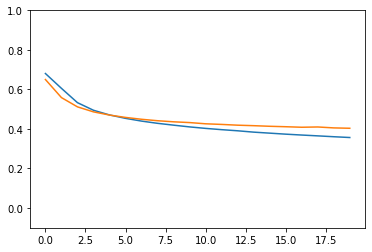

base


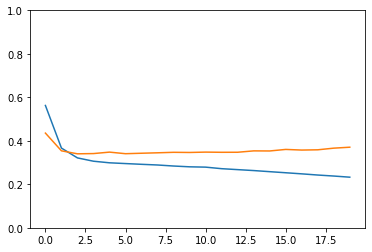

bigger


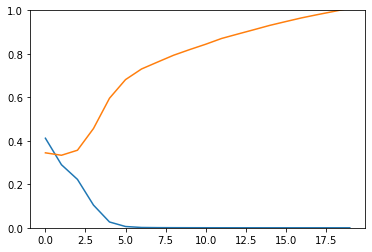

In [13]:
print("smaller")
plt.plot(smaller_history.history['loss'])
plt.plot(smaller_history.history['val_loss'])
plt.ylim((-0.1, 1.))
plt.show()

print("base")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("bigger")
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()


- 모델이 데이터양에 비해 클수록 오버피팅 발생이 일찍 온다
---
해결방법 
1. 모델을 줄인다. (너무 줄이면 학습 자체가 안됨)
2. 데이터 수를 늘린다.
3. 오버피팅 방지법을 사용한다.

# 과적합 처리

## weight Regularization

In [14]:
ㅣ2_baseline_model = keras.Sequential([
    # keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

ㅣ2_baseline_model.compile(optimizer='adam', loss='binary_crossentropy')

ㅣ2_baseline_model.summary()

l2_baseline_history = ㅣ2_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
44/44 - 0s - loss: 0.6223 - val_loss: 0.4827
Epoch 2/20
44/44 - 0s - loss: 0.4162 - val_loss: 0.3986
Epoch 3/20
44/44 - 0s - loss: 0.3664 - val_loss: 0.3822
Epoch 4/20
44/44 - 0s - loss: 0.3510 - val_loss: 0.3820
Epoch 5/20
44/44 - 0s - loss: 0.3430 - val_loss: 0.3835
Epoch 6/20
44/44 - 0s - loss: 0.3418 - val_loss: 0.3765
Epoch 7/20
44/44 - 0s - loss: 0.3351 - val_l

In [15]:
ㅣ2_bigger_model = keras.Sequential([
    # keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,), kernel_regularizer=keras.regularizers.l2(0.001)),
    # keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

ㅣ2_bigger_model.compile(optimizer='adam', loss='binary_crossentropy')

ㅣ2_bigger_model.summary()

l2_bigger_history = ㅣ2_bigger_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
44/44 - 1s - loss: 1.2766 - val_loss: 0.8914
Epoch 2/20
44/44 - 0s - loss: 0.7287 - val_loss: 0.6537
Epoch 3/20
44/44 - 0s - loss: 0.5496 - val_loss: 0.5624
Epoch 4/20
44/44 - 0s - loss: 0.4547 - val_loss: 0.5244
Epoch 5/20
44/44 - 0s - loss: 0.3805 - val_loss: 0.5203
Epoch 6/20
44/44 - 0s - loss: 0.3143 - val_loss: 0.5467
Epoch 7/20
44/44 - 0s - loss: 0.2457 - val

baseline


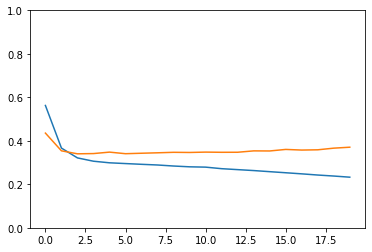

l2_baseline


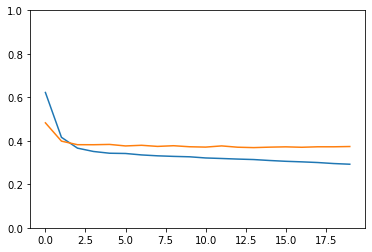

bigger


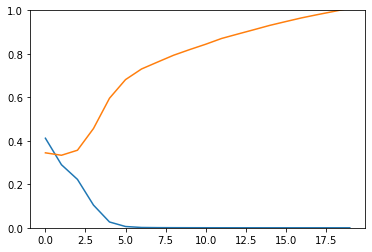

l2_bigger


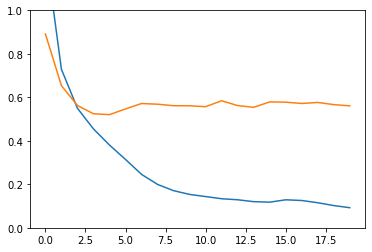

In [16]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("l2_baseline")
plt.plot(l2_baseline_history.history['loss'])
plt.plot(l2_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("bigger")
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("l2_bigger")
plt.plot(l2_bigger_history.history['loss'])
plt.plot(l2_bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

발생하던 오버피팅이 완화되었다.

## Drop Out

In [17]:
dropout_baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),    # ADD
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),    # ADDD
    keras.layers.Dense(1, activation='sigmoid')
])


dropout_baseline_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dropout_baseline_history = dropout_baseline_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.6930 - accuracy: 0.5303 - binary_crossentropy: 0.6930 - val_loss: 0.6614 - val_accuracy: 0.7036 - val_binary_crossentropy: 0.6614
Epoch 2/20
44/44 - 0s - loss: 0.6333 - accuracy: 0.6341 - binary_crossentropy: 0.6333 - val_loss: 0.5419 - val_accuracy: 0.8000 - val_binary_crossentropy: 0.5419
Epoch 3/20
44/44 - 0s - loss: 0.5452 - accuracy: 0.7285 - binary_crossentropy: 0.5452 - val_loss: 0.4487 - val_accuracy: 0.8260 - val_binary_crossentropy: 0.4487
Epoch 4/20
44/44 - 0s - loss: 0.4819 - accuracy: 0.7784 - binary_crossentropy: 0.4819 - val_loss: 0.3929 - val_accuracy: 0.8400 - val_binary_crossentropy: 0.3929
Epoch 5/20
44/44 - 0s - loss: 0.4366 - accuracy: 0.8076 - binary_crossentropy: 0.4366 - val_loss: 0.3618 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3618
Epoch 6/20
44/44 - 0s - loss: 0.4119 - accuracy: 0.8238 - binary_crossentropy: 0.4119 - val_loss: 0.3466 - val_accuracy: 0.8576 - val_binary_crossentropy: 0.3466
Epoch 7/20
44/44 - 0s - loss

In [18]:
dropout_bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),    # ADD
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),    # ADDD
    keras.layers.Dense(1, activation='sigmoid')
])


dropout_bigger_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dropout_bigger_history = dropout_bigger_model.fit(train_x,
                                    train_y,
                                    epochs=20,
                                    batch_size=512,
                                    validation_split=0.1,
                                    verbose=2)

Epoch 1/20
44/44 - 1s - loss: 0.4927 - accuracy: 0.7528 - binary_crossentropy: 0.4927 - val_loss: 0.3448 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3448
Epoch 2/20
44/44 - 0s - loss: 0.3346 - accuracy: 0.8567 - binary_crossentropy: 0.3346 - val_loss: 0.3287 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3287
Epoch 3/20
44/44 - 0s - loss: 0.2903 - accuracy: 0.8785 - binary_crossentropy: 0.2903 - val_loss: 0.3322 - val_accuracy: 0.8616 - val_binary_crossentropy: 0.3322
Epoch 4/20
44/44 - 0s - loss: 0.2549 - accuracy: 0.8963 - binary_crossentropy: 0.2549 - val_loss: 0.3413 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3413
Epoch 5/20
44/44 - 0s - loss: 0.2127 - accuracy: 0.9138 - binary_crossentropy: 0.2127 - val_loss: 0.3724 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3724
Epoch 6/20
44/44 - 0s - loss: 0.1634 - accuracy: 0.9365 - binary_crossentropy: 0.1634 - val_loss: 0.3923 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3923
Epoch 7/20
44/44 - 0s - loss

baseline


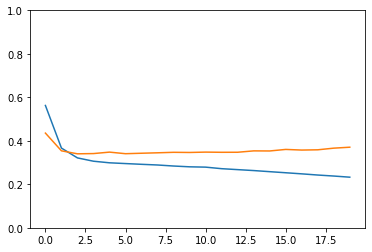

dropout_baseline


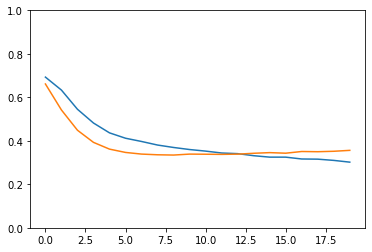

bigger


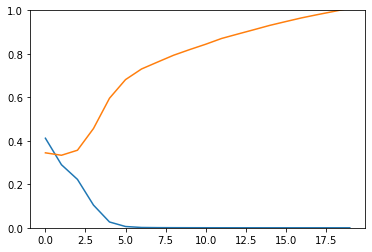

dropout_bigger


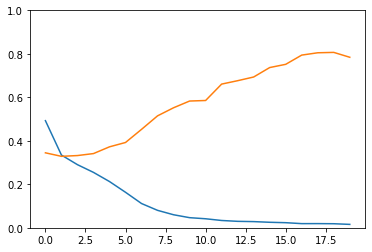

In [19]:
print("baseline")
plt.plot(baseline_history.history['loss'])
plt.plot(baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("dropout_baseline")
plt.plot(dropout_baseline_history.history['loss'])
plt.plot(dropout_baseline_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("bigger")
plt.plot(bigger_history.history['loss'])
plt.plot(bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

print("dropout_bigger")
plt.plot(dropout_bigger_history.history['loss'])
plt.plot(dropout_bigger_history.history['val_loss'])
plt.ylim((0., 1.))
plt.show()

# 보충자료

## numpy indexing
1,2행, 2,3열을 0으로 만들기
```
>>>import numpy as np
>>>arr = np.arange(16).reshape(4,4)
>>>arr
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
       
>>>arr[:2, 1:3]=0
>>>arr
array([[ 0,  0,  0,  3],
       [ 4,  0,  0,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])
```